              precision    recall  f1-score   support

           0       0.83      0.74      0.78       160
           1       0.52      0.65      0.58        71

    accuracy                           0.71       231
   macro avg       0.67      0.69      0.68       231
weighted avg       0.73      0.71      0.72       231



Text(95.72222222222221, 0.5, 'Actual')

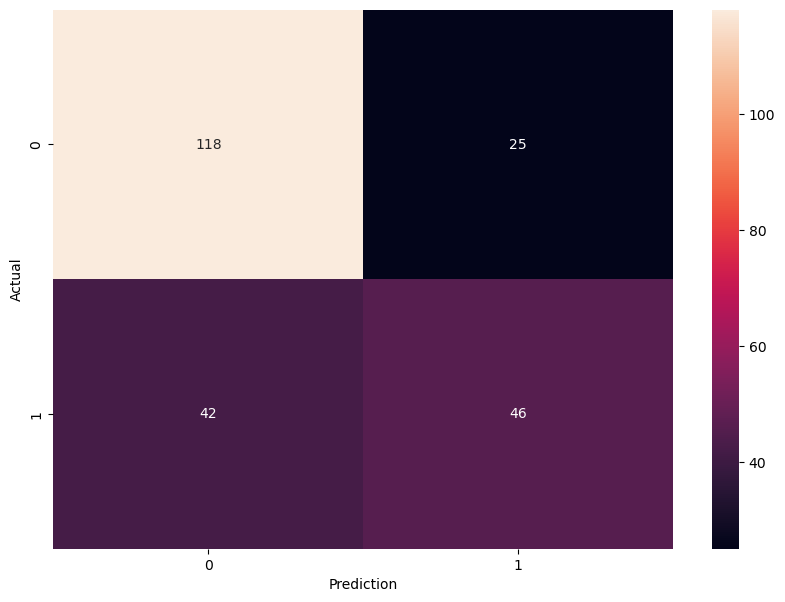

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sn
%matplotlib inline

# data set
df = pd.read_csv('diabetes.csv')
df.sample(5)

#data cleaning:
df.replace([np.inf, -np.inf], np.nan, inplace = True)
df.replace([np.nan], 0, inplace = True)

#seperate the input feature and output feature into X, Y
X = df
Y = X['Outcome']
X.drop('Outcome', axis = 'columns', inplace = True)
X = pd.DataFrame(X)

#Data Normalization (min/MAX)
ms = MinMaxScaler()
X = ms.fit_transform(X)

#split the data into train and test:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size = 0.3, random_state = 5)

#Tmporting ML algorithm
from sklearn.neighbors import KNeighborsClassifier

#Defining our ML model, train the mode; using train dataset:
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
model.fit(xtrain, ytrain)

#predict using the test dataset
pred = model.predict(xtest)

#Evaluate the confusion matrix
mat = classification_report(ytest, pred)
print(mat)

#to see the confusion matrix
cm = confusion_matrix(pred, ytest)

#plot the confusion matrix table
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Actual')



In [23]:
#predict by new 'observation' --> Data generalization 

observations = [5, 115, 65, 25, 170, 27.5, 0.514, 30]

observations =pd.DataFrame(observations)
print("Get the shape of the data:\n", observations)
print("--------------------------\n")

#notes that how it transforms into a row matrix, even though the initial dataset
observations = observations.transpose()
observations = ms.fit_transform(observations)
prediction = model.predict(observations)
print("the predicted class of the observation is: class", prediction)



Get the shape of the data:
          0
0    5.000
1  115.000
2   65.000
3   25.000
4  170.000
5   27.500
6    0.514
7   30.000
--------------------------

the predicted class of the observation is: class [0]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Text(95.72222222222221, 0.5, 'Actual')

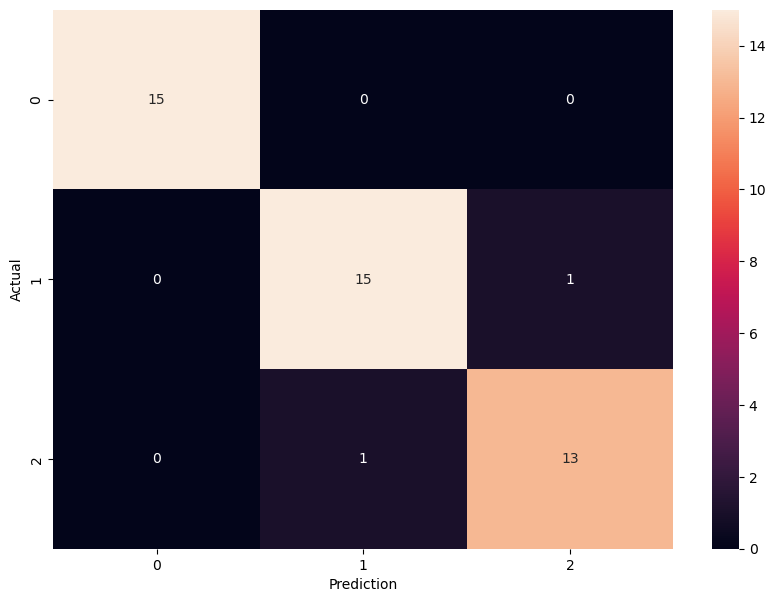

In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm #Support vector machine
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sn

#data set 
df = pd.read_csv('iris.csv')
#data cleaning
df.replace([np.Inf, -np.Inf], np.nan, inplace = True)
df.replace(np.nan, 0, inplace = True)

#seperate the data into input, output var
X = df
Y = X['variety']
X.drop('variety', axis = 'columns', inplace = True)

#Labeling the output
le = LabelEncoder()
Y = le.fit_transform(Y)

#Data Normalization 
ms = MinMaxScaler()
X = ms.fit_transform(X)

#Split the data into train, test data sample

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 5)

#define the ML model 
model = svm.SVC()
#train the model
model.fit(xtrain, ytrain)

#predict the output of the ML model 
pred = model.predict(xtest)

cr=classification_report(ytest, pred)
print(cr)

#confudion matrix
cm = confusion_matrix(pred, ytest)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt ='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [33]:
observations = [3.5, 2.7, 1.7, 0.2]

observations = pd.DataFrame(observations)
print("Get the shape of the data:\n", observations)
print("--------------------------\n")

observations = observations.transpose()
observations = ms.fit_transform(observations)
prediction = model.predict(observations)
print("the predicted class of the new observation is : class", prediction)

Get the shape of the data:
      0
0  3.5
1  2.7
2  1.7
3  0.2
--------------------------

the predicted class of the new observation is : class [0]
